In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Loan_new.csv')

In [3]:
df.shape

(614, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         614 non-null    int64  
 1   Loan_ID            614 non-null    object 
 2   Gender             614 non-null    int64  
 3   Married            614 non-null    int64  
 4   Dependents         614 non-null    int64  
 5   Education          614 non-null    object 
 6   Self_Employed      614 non-null    int64  
 7   ApplicantIncome    614 non-null    int64  
 8   CoapplicantIncome  614 non-null    float64
 9   LoanAmount         614 non-null    float64
 10  Loan_Amount_Term   614 non-null    float64
 11  Credit_History     614 non-null    float64
 12  Property_Area      614 non-null    object 
 13  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(6), object(4)
memory usage: 67.3+ KB


In [5]:
df.isnull().sum()

Unnamed: 0           0
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [6]:
df.describe()

,Unnamed: 0,Gender,Married,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,306.500000,0.838762,0.657980,0.842020,0.237785,5403.459283,1621.245798,145.465798,342.410423,0.855049
std,177.390811,0.421752,0.484971,1.120531,0.534737,6109.041673,2926.248369,84.180967,64.428629,0.352339
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,153.250000,1.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,306.500000,1.000000,1.000000,0.000000,0.000000,3812.500000,1188.500000,125.000000,360.000000,1.000000
75%,459.750000,1.000000,1.000000,2.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,613.000000,2.000000,2.000000,4.000000,2.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [7]:
df.columns

Index(['Unnamed: 0', 'Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

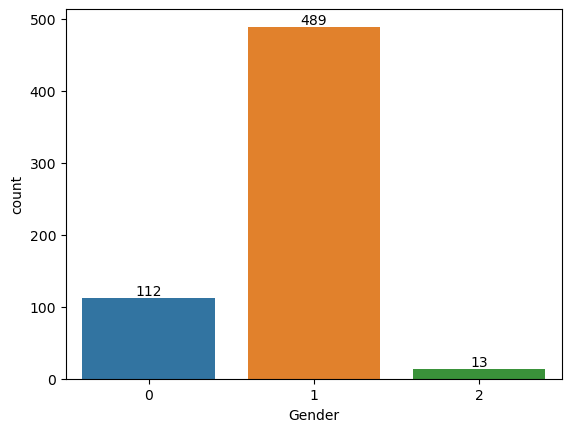

In [8]:
#plotting bar chart for gender count
a=sns.countplot(x='Gender',data=df)
for bars in a.containers:
    a.bar_label(bars)

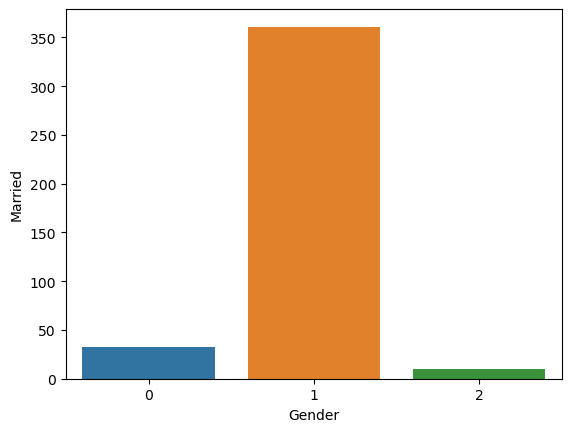

In [9]:
#plotting bar chart for gender and married
loan_gm=df.groupby(['Gender'], as_index=False)['Married'].sum().sort_values(by='Married', ascending=False)
a=sns.barplot(x='Gender',y='Married',data=loan_gm)

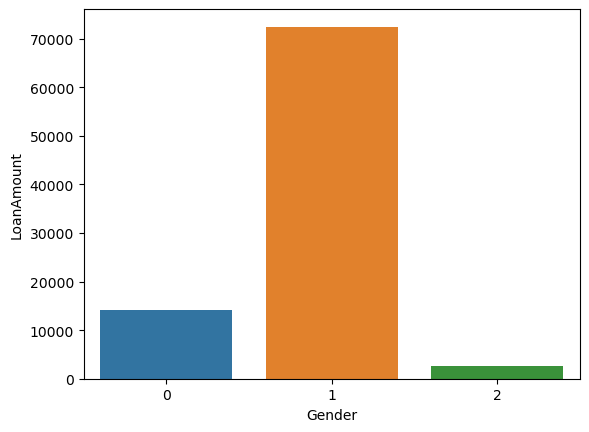

In [10]:
#plotting bar chart for gender and Loan Amount
loan_gla=df.groupby(['Gender'], as_index=False)['LoanAmount'].sum().sort_values(by='LoanAmount', ascending=False)
a=sns.barplot(x='Gender',y='LoanAmount',data=loan_gla)

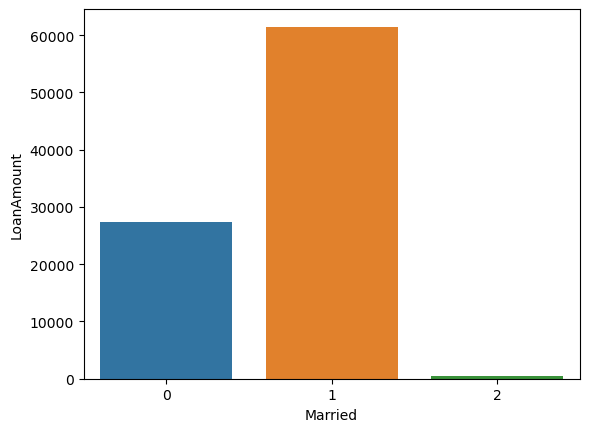

In [11]:
#plotting bar chart for married and Loan Amount
loan_mla=df.groupby(['Married'], as_index=False)['LoanAmount'].sum().sort_values(by='LoanAmount', ascending=False)
a=sns.barplot(x='Married',y='LoanAmount',data=loan_mla)

In [19]:
df['Self_Employed']=df['Self_Employed'].astype(str)
df['Gender']=df['Gender'].astype(str)

<Axes: xlabel='Self_Employed', ylabel='LoanAmount'>

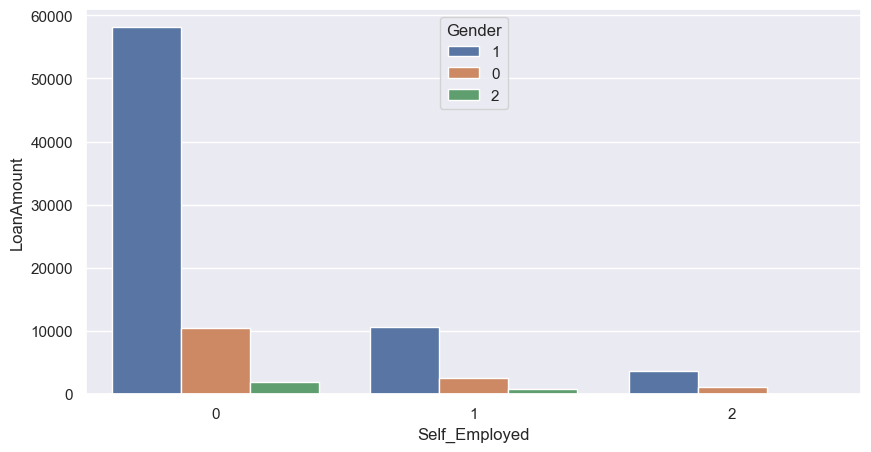

In [20]:
#plotting bar chart for self employed and Loan Amount
loan_seg=df.groupby(['Self_Employed','Gender'], as_index=False)['LoanAmount'].sum().sort_values(by='LoanAmount', ascending=False)
sns.set(rc={'figure.figsize':(10,5)})
sns.barplot(x='Self_Employed',y='LoanAmount',data=loan_seg,hue='Gender')

In [21]:
df['Married']=df['Married'].astype(str)

<Axes: xlabel='Self_Employed', ylabel='LoanAmount'>

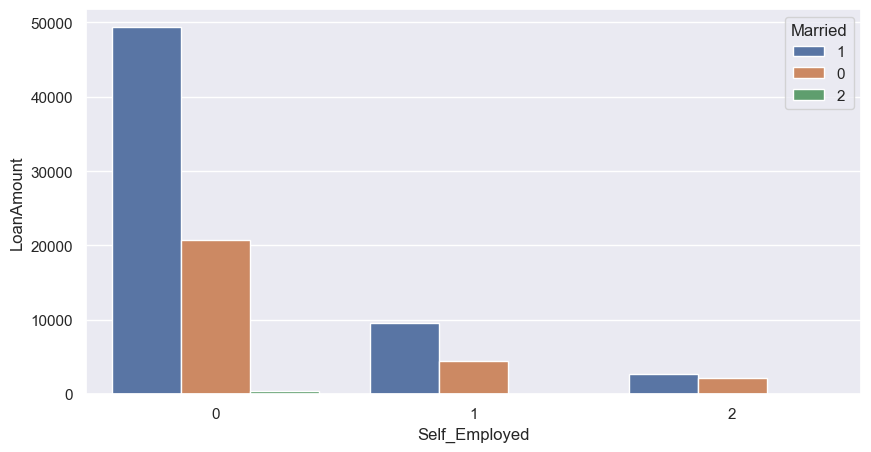

In [22]:
loan_seg=df.groupby(['Self_Employed','Married'], as_index=False)['LoanAmount'].sum().sort_values(by='LoanAmount', ascending=False)
sns.set(rc={'figure.figsize':(10,5)})
sns.barplot(x='Self_Employed',y='LoanAmount',data=loan_seg,hue='Married')

<Axes: xlabel='Property_Area', ylabel='LoanAmount'>

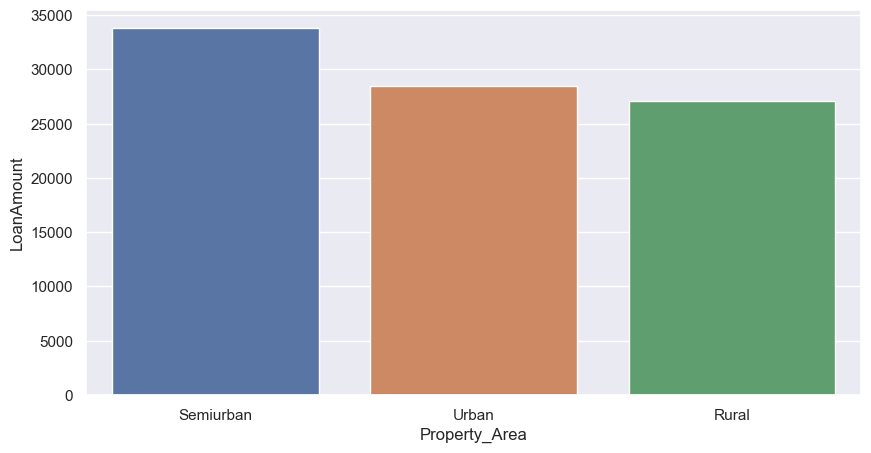

In [23]:
loan_pa=df.groupby(['Property_Area'], as_index=False)['LoanAmount'].sum().sort_values(by='LoanAmount', ascending=False)
sns.set(rc={'figure.figsize':(10,5)})
sns.barplot(x='Property_Area',y='LoanAmount',data=loan_pa)

<Axes: xlabel='Property_Area', ylabel='Loan_Amount_Term'>

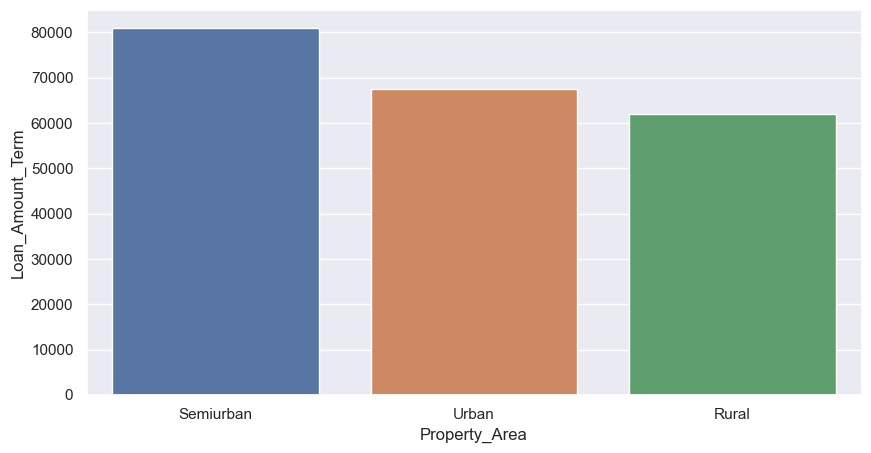

In [24]:
loan_lat=df.groupby(['Property_Area'], as_index=False)['Loan_Amount_Term'].sum().sort_values(by='Loan_Amount_Term', ascending=False)
sns.set(rc={'figure.figsize':(10,5)})
sns.barplot(x='Property_Area',y='Loan_Amount_Term',data=loan_lat)

<Axes: xlabel='Loan_Status', ylabel='LoanAmount'>

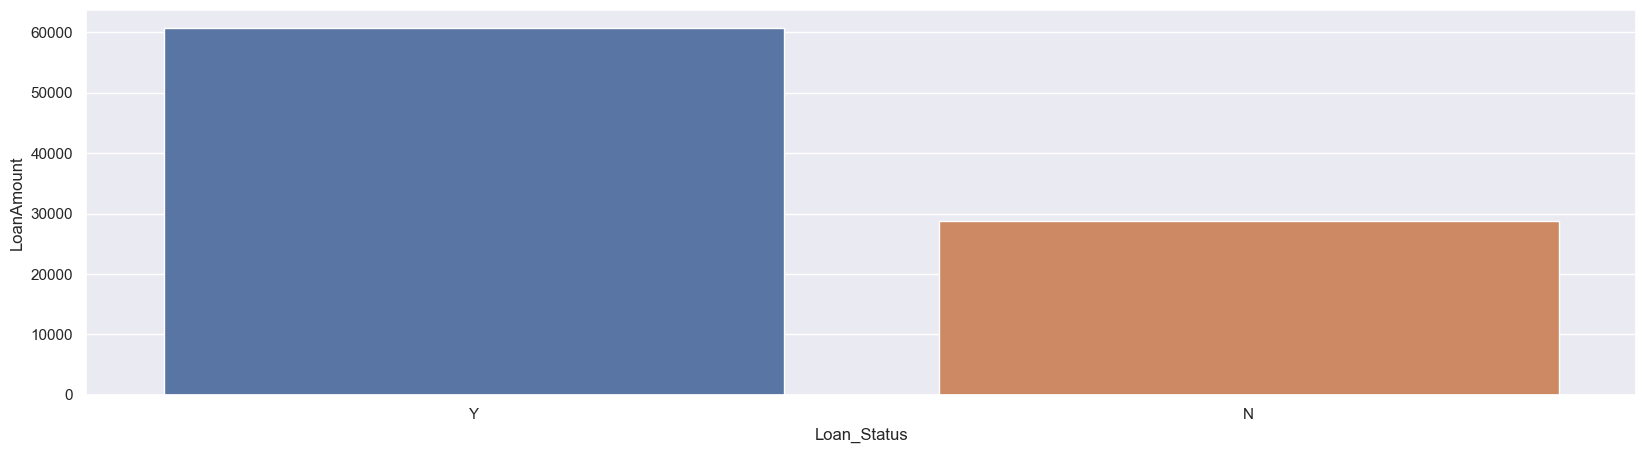

In [25]:
#plotting chart for loan amount and loan status
status=df.groupby(['Loan_Status'], as_index=False)['LoanAmount'].sum().sort_values(by='LoanAmount', ascending=False)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(x='Loan_Status',y='LoanAmount',data=status)

#Loan_Status


In [27]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Loan_Status']=le.fit_transform(df['Loan_Status'])

<Axes: xlabel='Loan_Status', ylabel='ApplicantIncome'>

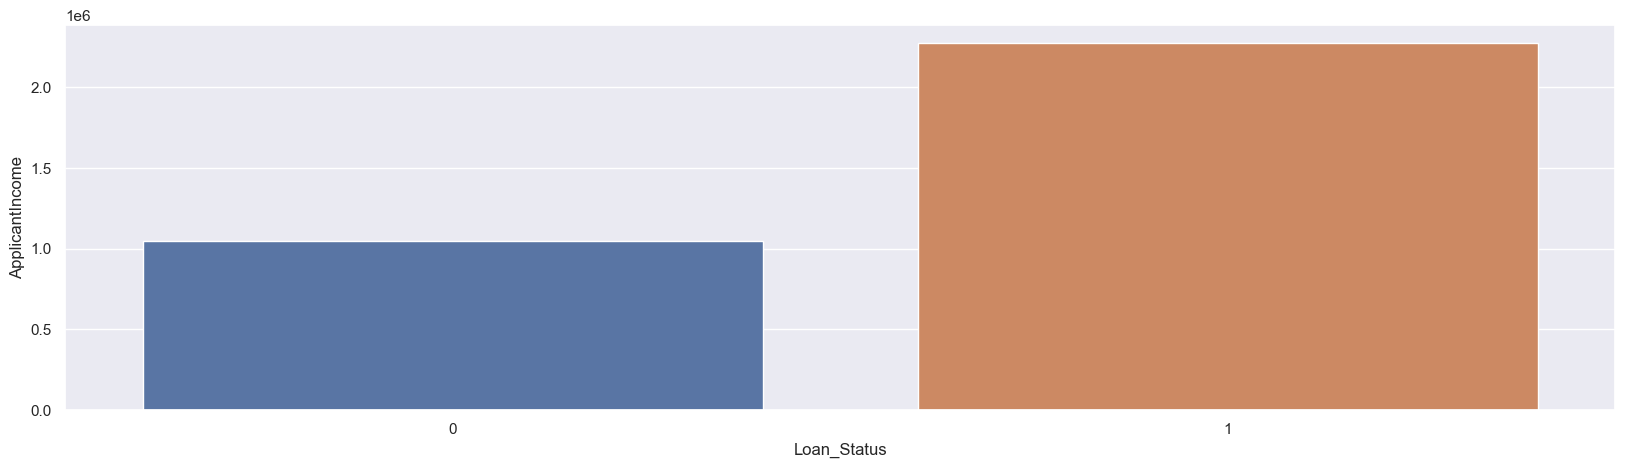

In [33]:
status=df.groupby(['Loan_Status'], as_index=False)['ApplicantIncome'].sum().sort_values(by='ApplicantIncome', ascending=False)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(x='Loan_Status',y='ApplicantIncome',data=status)

<Axes: xlabel='Loan_Status', ylabel='ApplicantIncome'>

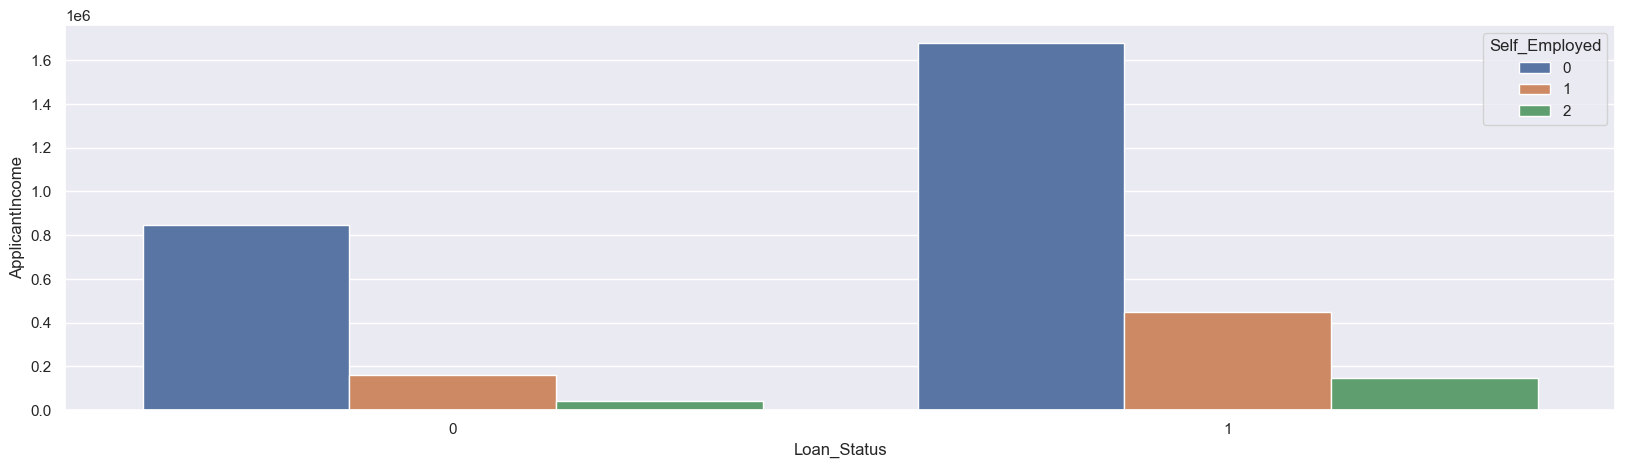

In [34]:
status=df.groupby(['Loan_Status','Self_Employed'], as_index=False)['ApplicantIncome'].sum().sort_values(by='ApplicantIncome', ascending=False)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(x='Loan_Status',y='ApplicantIncome',data=status,hue='Self_Employed')

<Axes: xlabel='Loan_Status', ylabel='ApplicantIncome'>

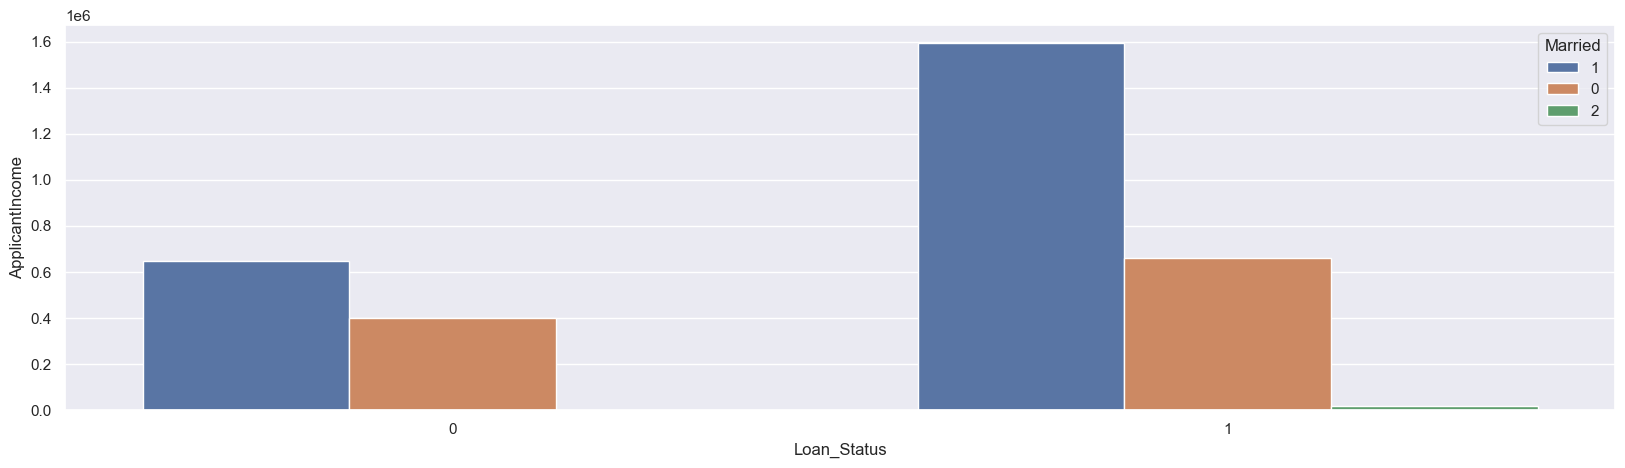

In [35]:
status=df.groupby(['Loan_Status','Married'], as_index=False)['ApplicantIncome'].sum().sort_values(by='ApplicantIncome', ascending=False)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(x='Loan_Status',y='ApplicantIncome',data=status,hue='Married')

<Axes: xlabel='Loan_Status', ylabel='ApplicantIncome'>

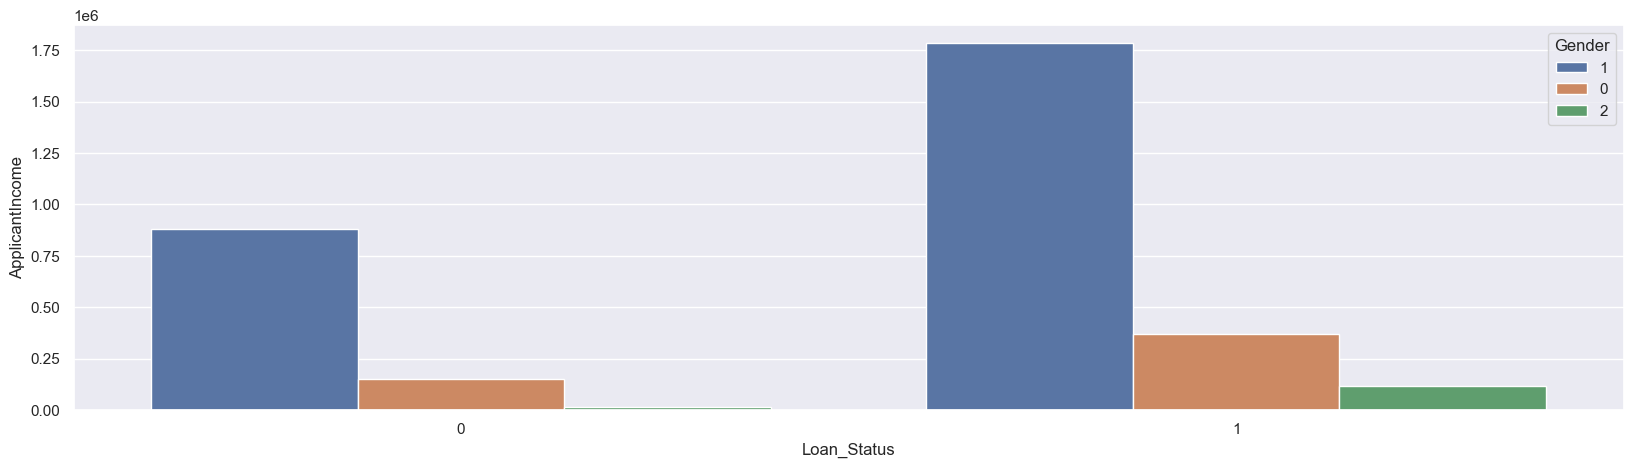

In [36]:
status=df.groupby(['Loan_Status','Gender'], as_index=False)['ApplicantIncome'].sum().sort_values(by='ApplicantIncome', ascending=False)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(x='Loan_Status',y='ApplicantIncome',data=status,hue='Gender')

<Axes: xlabel='Loan_Status', ylabel='ApplicantIncome'>

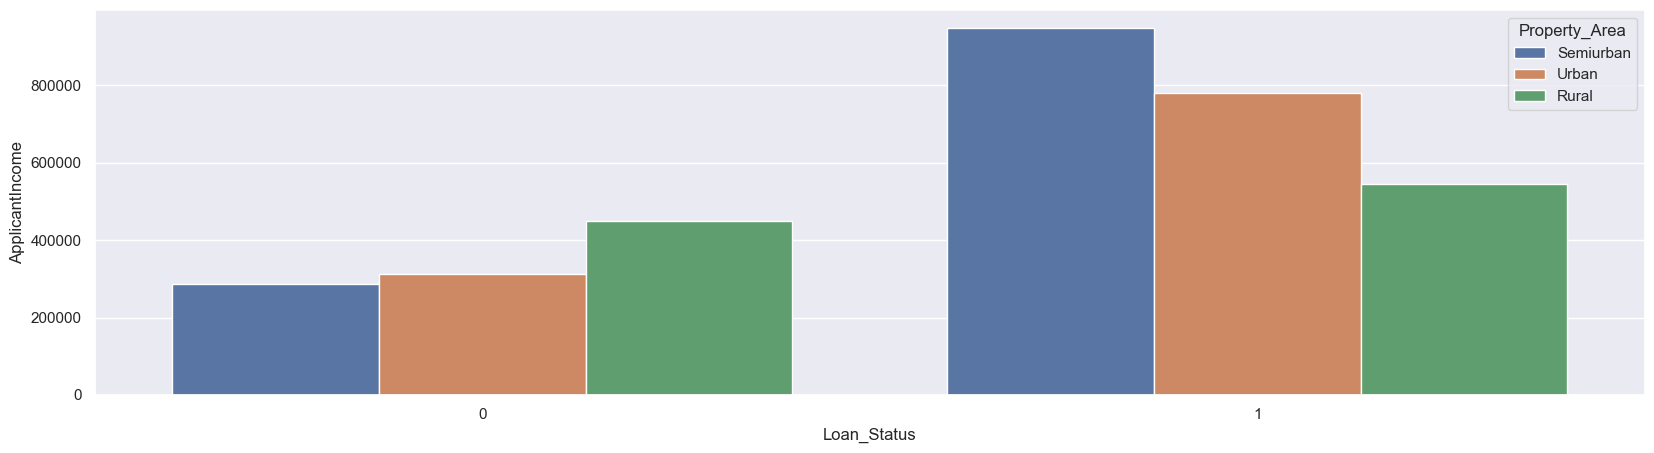

In [37]:
status=df.groupby(['Loan_Status','Property_Area'], as_index=False)['ApplicantIncome'].sum().sort_values(by='ApplicantIncome', ascending=False)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(x='Loan_Status',y='ApplicantIncome',data=status,hue='Property_Area')

<Axes: xlabel='Loan_Status', ylabel='Loan_Amount_Term'>

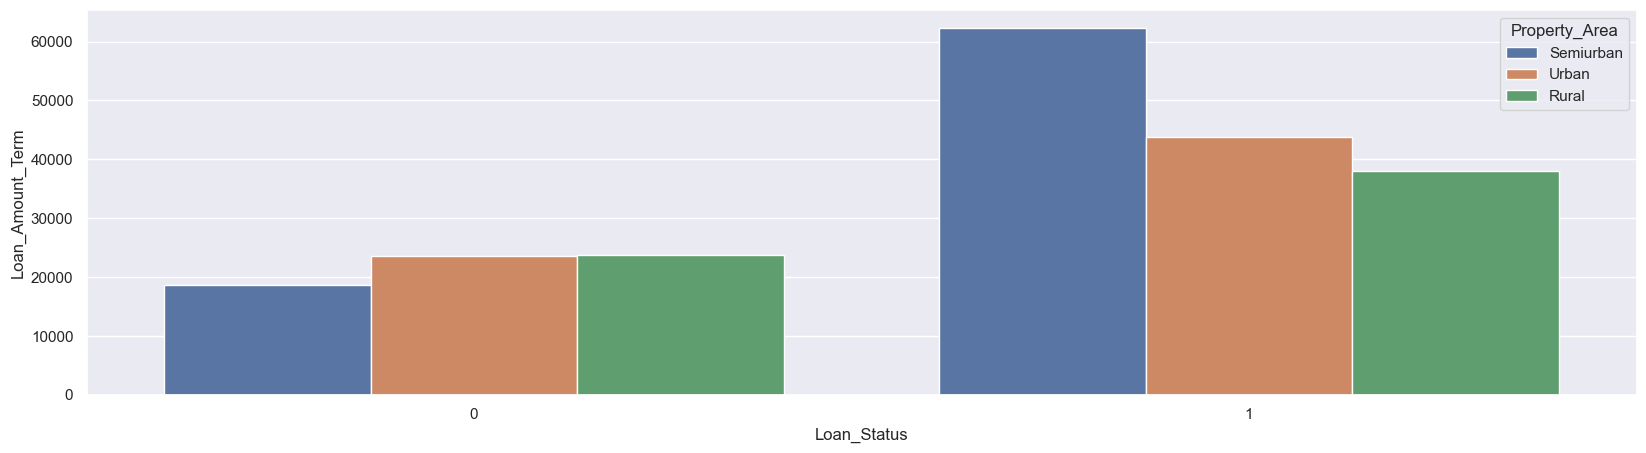

In [39]:
status=df.groupby(['Loan_Status','Property_Area'], as_index=False)['Loan_Amount_Term'].sum().sort_values(by='Loan_Amount_Term', ascending=False)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(x='Loan_Status',y='Loan_Amount_Term',data=status,hue='Property_Area')